In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import scipy as sp
import os

In [2]:
# import all data 
mercury_data = pd.DataFrame({
        'wavelength': [], 
        'polarization': [], 
        'b-field': [], 
        'data': []
    }
).astype({'data':'object'})

mercury_data.set_index(['wavelength', 'polarization', 'b-field'], inplace=True)

mercury_dir = './data/mercury'  
neon_dir = './data/neon'

# upload everything into the dataframe

for file in os.listdir(mercury_dir):
    filename = os.fsdecode(file)
    key = tuple(filename.replace('.tsv', '').split("_"))
    
    data_to_store = pd.read_csv(os.path.join(mercury_dir, filename), sep = '\t', names = ['wavelength', 'counts'])
    mercury_data.loc[key, 'data']=[data_to_store]
    


print(mercury_data.loc[('404.7nm', '024deg', '0.9T'), 'data'])

[     wavelength  counts
0       405.100     146
1       405.101     158
2       405.102     170
3       405.103     170
4       405.104     202
..          ...     ...
96      405.196     186
97      405.197     186
98      405.198     158
99      405.199     154
100     405.200     172

[101 rows x 2 columns]]


('404.7nm', '024deg')
Theorized resolution: 0.006142661934283409
[4.05150495e+02 3.77322956e-05]
('404.7nm', '114deg')
Theorized resolution: 0.0041734007668656975
[4.05150503e+02 1.74172740e-05]
('435.8nm', '024deg')
Theorized resolution: 0.31622776601683794
[4.e+02 1.e-01]
('435.8nm', '114deg')
Theorized resolution: 0.454976860301465
[4.57954848e+02 2.07003943e-01]
('546.1nm', '024deg')
Theorized resolution: 0.31622776601683794
[4.e+02 1.e-01]
('546.1nm', '114deg')
Theorized resolution: 0.31622776601683794
[4.e+02 1.e-01]


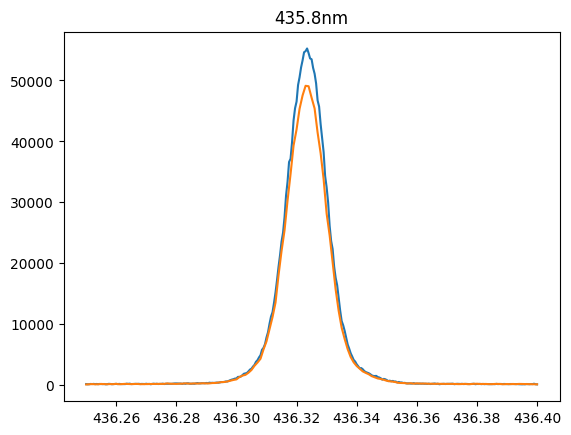

In [ ]:
# example of choosing a datapoint

chosen_data = mercury_data.loc[("546.1nm", "024deg", "1.4T"), 'data'][0]

# example of filtering based off of a certain metric 

all_114 = mercury_data.xs('0.0T', level='b-field')


# Fit all data to get its half-width with a gaussian distribution, see if the resolution is the same across the board

for index, row in all_114.iterrows(): 
    xdata = row["data"][0]["wavelength"].tolist()    
    ydata = row["data"][0]["counts"].tolist()
    print(index)
    param1, param2 = sp.optimize.curve_fit(f=sp.stats.cauchy.pdf, xdata=xdata, ydata=ydata, p0 = [400, 0.1] )
    print(f"Theorized resolution: {np.sqrt(param1[1])}")
    if(index[0]=='435.8nm'):
        plt.plot(xdata,ydata,label='')
    plt.title('435.8nm')
    print(param1)    

plt.show()





In [4]:
tsv_data = []

tsv_data = pd.read_csv("./data/mercury/404.7nm_024deg_0.0T.tsv", sep = '\t')

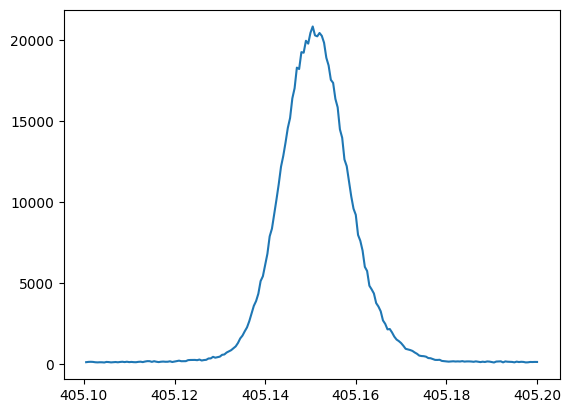

In [15]:
xdata = (tsv_data.to_numpy().T)[0]
ydata = (tsv_data.to_numpy().T)[1]

plt.plot(xdata,ydata)
plt.show()


param1, param2 = sp.optimize.curve_fit(f=sp.stats.cauchy.pdf, xdata=xdata, ydata=ydata, p0 = [405.1, 0.1] )

In [16]:
print(np.sqrt(param1[1]))

0.0038010884421247914


1